# Assignment 1 - Question 3
### Anya P. Conti

## I. Set-up
First we import in all the necessary libraries.  



In [1]:
from keras import callbacks
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
from keras import metrics
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


After that, we load in the data set, and the training and test data and training and test labels to variables. Then we check the shape of the data. Since the labels are not in one-hot formatting, we will need to reformat this.  However, since we use keras for this question, we can simply use the to_categorical() function when we feed the data in.  

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print("Training set images shape: {shape}".format(shape=X_train.shape))
print("Training set labels shape: {shape}".format(shape=Y_train.shape))

print("Test set images shape: {shape}".format(shape=X_test.shape))
print("Test set labels shape: {shape}".format(shape=Y_test.shape))

170500096/170498071 [==============================] - 71s 0us/step
Training set images shape: (50000, 32, 32, 3)
Training set labels shape: (50000, 1)
Test set images shape: (10000, 32, 32, 3)
Test set labels shape: (10000, 1)


## II. The Model

Some intuition behind the model:
- To prevent overfitting:
    - **Validation:** Though the data was already split into training and test data, I further split the training set into a training and validation set (20% of the training data).  This way, the hyperparameters could be tuned with a different data set than the training model, and the model could be tested with a different data set still, all to prevent overfitting.  
    - **Dropout:** In order to prevent the model from overfitting the training data, I used dropout to randomly drop some of the neurons.  
    - **Early stopping:** To prevent the model from continuing to train and improve its fit on the training data but not the validation data which would imply overfitting, I implemented early stopping.  When there have been 7 epochs without an improvement of atleast 0.0001 in the validation set accuracy, the neural network stops training.  
- To make an accurate model: 
    - **Small kernel size:** Will take longer to run, but this should theoretically improve the accuracy of the model.  
    - **Many filters in convolution layers:** Will take longer to run, but this should theoretically improve the accuracy of the model.  
    - **Many units in dense layers:** Will take longer to run, but this should theoretically improve the accuracy of the model.  
    - **No batches:** While this takes longer, the lack of batches should provide a more accurate model.  I did play around with using batches, and this seemed to be true.  
    - **Adam optimizer:** From parts 1 and 2, the Adam optimizer seemed to provide the lowest loss function by far.  I did play around with different loss functions that were not used in parts 1 and 2 such as Nadam, but those did not seem to improve the model.  
    - **ReLU activation function:** This seems to be the most common by data scientists to use in similar situations for its accuracy, and studies show that it is one of the better activation functions.  I did also try playing around with different activation functions such as LeakyReLU, but this did not seem to improve the model.  
- To provide invariance in local translations of an image:
    - **Pooling:** I used pooling so that the model would be location invariant.  

In addition, I have also tried playing around with the following features of the model to try to improve it and see how it would affect the model, but all of them either made no significant difference, or sometimes even decreased the accuracy of the model:
- Lowering the amount of dropout in the hidden layers from .5 to .3 in the first and .4 in the second
- Changing the learning rate
- Changing the decay rate of the learning rate
- Changing the optimizer to Nadam
- Changing activation function to Leaky ReLU
- Using batches of 50 and 250
- Turning off the shuffle
- Playing around with adding layers 
- Changing the kernel sizes to (2,2) and (4,4)

After all of these, this remains the best model that I could find.  


In [7]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))




# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy', metrics.top_k_categorical_accuracy])


# Callback
earlystop = callbacks.EarlyStopping(monitor = 'val_acc', min_delta=0.0001, 
                          patience=7, restore_best_weights = True)


# Train the model
history = model.fit(X_train, to_categorical(Y_train),
                    shuffle=True,
                    epochs=250,
                    validation_split=0.2,
                    callbacks=[earlystop])




Train on 40000 samples, validate on 10000 samples
Epoch 1/250
40000/40000 [==============================] - 25s 616us/step - loss: 4.3526 - acc: 0.1326 - top_k_categorical_accuracy: 0.5920 - val_loss: 2.1650 - val_acc: 0.1742 - val_top_k_categorical_accuracy: 0.7253
Epoch 2/250
40000/40000 [==============================] - 24s 597us/step - loss: 2.1224 - acc: 0.1934 - top_k_categorical_accuracy: 0.7384 - val_loss: 1.9459 - val_acc: 0.2500 - val_top_k_categorical_accuracy: 0.7952
Epoch 3/250
40000/40000 [==============================] - 24s 594us/step - loss: 1.9538 - acc: 0.2417 - top_k_categorical_accuracy: 0.8035 - val_loss: 1.8146 - val_acc: 0.3063 - val_top_k_categorical_accuracy: 0.8525
Epoch 4/250
40000/40000 [==============================] - 24s 595us/step - loss: 1.8299 - acc: 0.2987 - top_k_categorical_accuracy: 0.8417 - val_loss: 1.6754 - val_acc: 0.3867 - val_top_k_categorical_accuracy: 0.8940
Epoch 5/250
40000/40000 [==============================] - 24s 597us/step - lo

## III. Results

### A. Evaluation of the final mode using test set

The final model has a loss of 0.702.  The top-1 error is 0.233 and the top-5 error is only 0.017, so it is fairly accurate.  

In [8]:
# Evaluate the model
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Test Loss: %.3f' % scores[0])
print('Test Top-1 Error: %.3f' % (1-scores[1]))
print('Test Top-5 Error: %.3f' % (1-scores[2]))

10000/10000 [==============================] - 2s 160us/step
Test Loss: 0.702
Test Top-1 Error: 0.233
Test Top-5 Error: 0.017


### B. Graphing the model performance and improvement over epochs

Though the instructions said to graph the loss, top-1 error, and top-5 error over epochs for both the training and test set, because I used a validation set separate from the test set, this will instead be done using the training and validation set.  

#### 1. Loss function

The loss function drops the most at the start.  The validation loss is lower than the training loss until around the 30th epoch (though they are fairly close), and then they switch and start to diverge a lot pointing to overfitting.  Because of the early stopping, I stop training the model when the validation accuracy does not improve much, so that is why the model stops when the validation loss plateaus, even though the training loss is still dropping.  

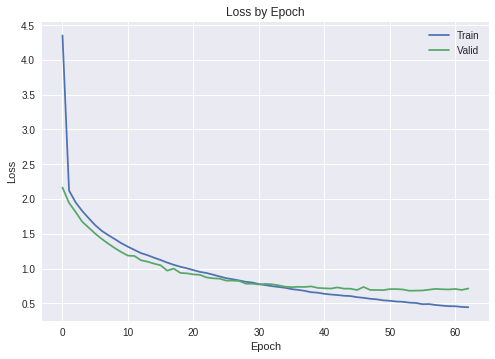

In [9]:
#Graph Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


#### 2. Top-1 Error

This is pretty similar to the loss graph, with the same patterns.  The loss decreases as the error of the top prediction decreases, so this correlation makes sense.  

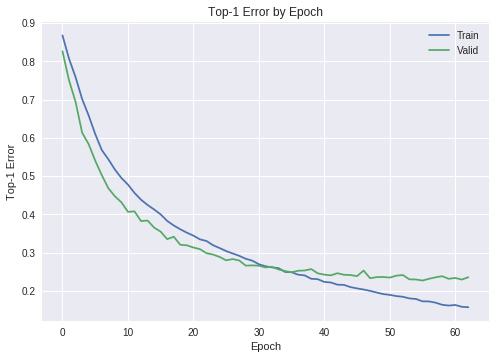

In [10]:
#Graph Top-1 Error
traintop1 = history.history['acc']
traintop1[:] = [1 - x for x in traintop1]
validtop1 = history.history['val_acc']
validtop1[:] = [1 - y for y in validtop1]

plt.plot(traintop1)
plt.plot(validtop1)
plt.title('Top-1 Error by Epoch')
plt.ylabel('Top-1 Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


#### 3. Top-5 Error

While this also shows fairly similar patterns to the above two graphs, it is a lot steeper at the start and plateaus far faster.  This is because the model is very quickly able to predict the true result at least within the top 5, even if not within the top 1, but after achieving this, there is little room for improvement with the top 5 error.  

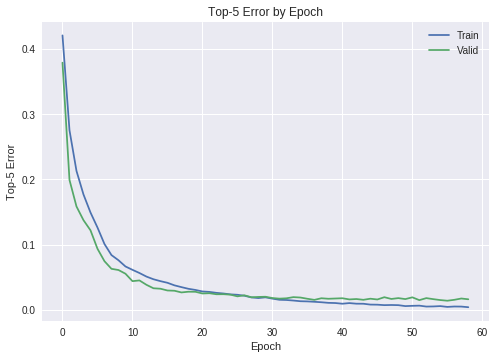

In [0]:
#Graph Top-5 Error
traintop5 = history.history['top_k_categorical_accuracy']
traintop5[:] = [1 - x for x in traintop5]
validtop5 = history.history['val_top_k_categorical_accuracy']
validtop5[:] = [1 - y for y in validtop5]

plt.plot(traintop5)
plt.plot(validtop5)
plt.title('Top-5 Error by Epoch')
plt.ylabel('Top-5 Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


## IV. Summary
With a top-1 error of 0.233 and a top-5 error of 0.017, tbe model did fairly well, especially when looking at the top-5 error rate, though there is still definitely has room for improvement.  Unfortunately, even with all the tuning I attempted, most models had similar error rates.  After a while, the model started overfitting, but we were able to prevent this from being too bad through the use of validation, dropout, and early stopping.  We found that the top-5 error rate converges far faster than the top-1 error rate.  All in all, given that designing neural networks takes a lot of trial and error, the result is fairly satisfactory.  